# Let's Code

###  principal component analysis

In [11]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


 ### Loading the Wine dataset 

In [2]:
df_wine = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', 
    header=None)

In [3]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
     train_test_split(X, y, test_size=0.3, random_state=0)

### Standardize the data

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

### Construct the covariance matrix, 

In [7]:
covariant_matrix = np.cov(X_train_std.T)
covariant_matrix 

array([[ 1.00813008,  0.08797701,  0.23066952, -0.32868099,  0.2141631 ,
         0.35576761,  0.2991246 , -0.16913744,  0.09649074,  0.56962271,
        -0.04781543,  0.07403492,  0.63277882],
       [ 0.08797701,  1.00813008,  0.2016416 ,  0.30658143, -0.06030917,
        -0.30124242, -0.41221162,  0.36616593, -0.19190146,  0.30749173,
        -0.54992807, -0.39352761, -0.20253906],
       [ 0.23066952,  0.2016416 ,  1.00813008,  0.44971971,  0.18321413,
         0.12235533,  0.06130256,  0.18655693, -0.02607834,  0.24555355,
        -0.10928021, -0.01820002,  0.15948032],
       [-0.32868099,  0.30658143,  0.44971971,  1.00813008, -0.08930998,
        -0.37018442, -0.41804463,  0.40212108, -0.25765667, -0.03090225,
        -0.25313262, -0.28934372, -0.48504311],
       [ 0.2141631 , -0.06030917,  0.18321413, -0.08930998,  1.00813008,
         0.16513295,  0.14458703, -0.30763563,  0.27228619,  0.1260674 ,
         0.05792599,  0.01596134,  0.31461066],
       [ 0.35576761, -0.301242

### Decompose the covariance matrix into its eigenvectors and eigenvalues

In [9]:
eigen_values, eigen_vectors = np.linalg.eig(covariant_matrix)
eigen_values, eigen_vectors[::5]

(array([4.8923083 , 2.46635032, 1.42809973, 1.01233462, 0.84906459,
        0.60181514, 0.52251546, 0.08414846, 0.33051429, 0.29595018,
        0.16831254, 0.21432212, 0.2399553 ]),
 array([[ 1.46698114e-01,  5.04170789e-01, -1.17235150e-01,
          2.06254611e-01, -1.87815947e-01, -1.48851318e-01,
         -1.79263662e-01, -5.54687162e-02, -4.03054922e-01,
         -4.17197583e-01,  2.75660860e-01,  4.03567189e-01,
          4.13320786e-04],
        [ 3.89344551e-01,  9.36399132e-02,  1.80804417e-01,
          1.93179478e-01,  1.40645426e-01,  1.22248798e-02,
          5.31455344e-02, -4.21265116e-01,  1.35111456e-01,
         -2.80985650e-01,  2.83897644e-01, -6.18600153e-01,
          9.45645138e-02],
        [ 3.00325353e-01, -2.79243218e-01,  9.32387182e-02,
          2.41740256e-02, -3.72610811e-01,  2.16515349e-01,
         -3.84654748e-01, -1.05383688e-01, -5.17259438e-01,
          1.97814118e-01, -1.98844532e-01, -2.00456386e-01,
         -3.02254353e-01]]))

### Principle Components with respect to Explained Variance Ratio

<function matplotlib.pyplot.show(*args, **kw)>

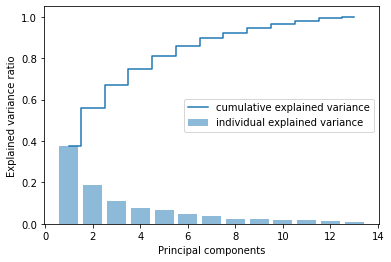

In [12]:
tot = sum(eigen_values)
var_exp = [(i / tot) for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

bar(range(1,14), var_exp, alpha=0.5, align='center',
                  label='individual explained variance')
step(range(1,14), cum_var_exp, where='mid',
                  label='cumulative explained variance')
ylabel('Explained variance ratio')
xlabel('Principal components')
legend(loc='best')
show

### Sort the eigenvalues by decreasing order to rank the eigenvectors

In [13]:
eigen_pairs = \
[(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range(len(eigen_values))]
eigen_pairs.sort(reverse=True)

In [14]:

eigen_pairs[:5]

[(4.8923083032737456,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.4663503157592297,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048453,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.0123346209044957,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.8490645933450257,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.14064543

### Next, we collect the two eigenvectors that correspond to the two largest values to capture about 60 percent of the variance in this dataset.

#### Now we've created a 13×2 projection matrix W from the top two eigenvectors.

In [15]:
w= np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
w.shape

(13, 2)

In [16]:
w

array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

In [17]:

X_train_std[0]

array([ 0.91083058, -0.46259897, -0.01142613, -0.82067872,  0.06241693,
        0.58820446,  0.93565436, -0.7619138 ,  0.13007174, -0.51238741,
        0.65706596,  1.94354495,  0.93700997])

#### In the same way, we can transform the entire 124×13 training dataset onto the two principal components by calculating the matrix dot product:

In [18]:
X_train_std[0].dot(w)

array([2.59891628, 0.00484089])

In [19]:
X_train_pca = X_train_std.dot(w)
X_train_std.shape, w.shape, X_train_pca.shape

((124, 13), (13, 2), (124, 2))

### visualization of  transformed Wine training set in a two-dimensional scatterplot:

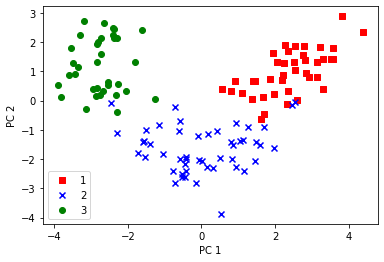

In [20]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1],
            c=c, label=l, marker=m)
xlabel('PC 1')
ylabel('PC 2')
legend(loc='lower left')
show()

In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    xlim(xx1.min(), xx1.max())
    ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),
                marker=markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


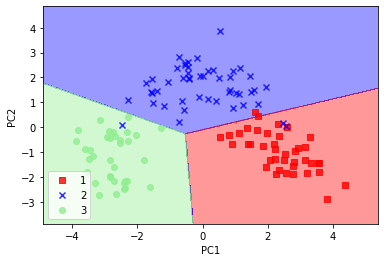

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
xlabel('PC1')
ylabel('PC2')
legend(loc='lower left')
show()